In [2]:
import numpy as np
import matplotlib.pyplot as plt


[[1 2 3]
 [4 5 6]]


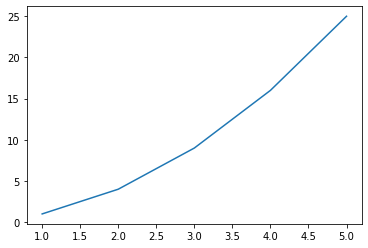

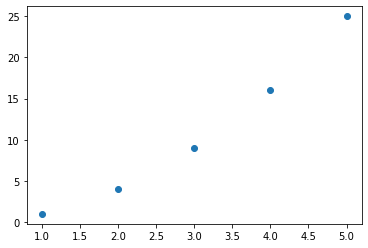

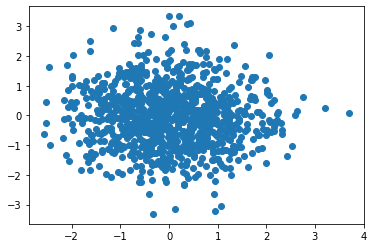

In [3]:
my_array=np.array([[1,2,3],[4,5,6]])
print(my_array)
plt.plot([1,2,3,4,5],[1,4,9,16,25])
plt.show()
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()
x=np.random.randn(1000)
y=np.random.randn(1000)
plt.scatter(x,y)
plt.show()



In [4]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()




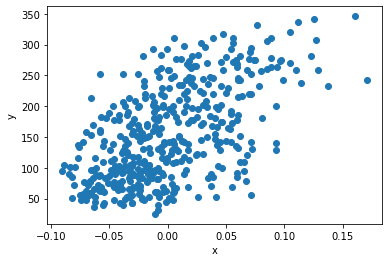

(442, 10)


In [5]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(diabetes.data.shape) # 데이터의 행렬을 제공해 준다

In [6]:
x=diabetes.data[:,2] # 2차원 배열의 슬라이싱을 위해서, 행은 모두, 살리고 열은 2열만 살린다
y=diabetes.target


In [7]:
# y=wx+b 경사하강법
w=1.0
b=1.0
y_hat=x[0]*w+b
print(y_hat)
print(y[0])
w_inc=w+0.1
y_hat_inc=x[0]*w_inc+b
#변화율은 결국 w의 변화에 따른 y의 변화량으로 정의된다. 이 변화율을 이용할 것이다. 
print(y_hat_inc)





1.0616962065186886
151.0
1.0678658271705574


In [8]:
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
w_new=w+w_rate
b_inc=b+0.1
y_hat_inc=x[0]*w+b_inc
b_rate=(y_hat_inc-y_hat)/(b_inc-b)
b_new=b+1



In [9]:
# 오차 역전파, y와 y hat의 차이만큼을 가중치에 곱하여 업데이트함
err=y[0]-y_hat
w_new=w+w_rate*err
b_new=b+1*err

#첫 번째 샘플로 업데이트

In [10]:
# zip을 이용한 배열 내 모든 요소 소환
for x_i, y_i in zip(x,y):
    y_hat=x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+err
print(w,b)

587.8654539985689 99.40935564531424


모델 만드는 법
1. w와 b를 임의의 값으로 초기화
2. y와 y_hat의 오차를 구하고, w와 b의 변화율에 곱하여 w와 b를 업데이트한다
3. yhat이 y보다 커지면 오차는 음수가 되며 yhat이 y보다 작아지면 오차가 양수가 되어 알아서 업데이트가 가능하다. 

epoch: 한 모델의 반복으로 정확한 회귀 데이터를 얻는다. 

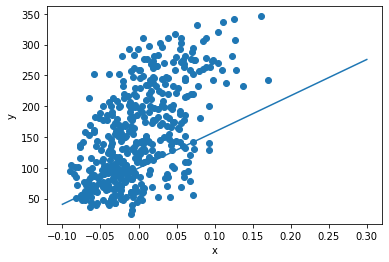

In [11]:
#plt.plot으로 그래프를 그릴 수가 있다. 
plt.scatter(x,y)
pt1=(-0.1, -0.1*w+b)
pt2=(0.3, 0.3*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
#epoch 반복
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat=x_i*w+b
        err=y_i-y_hat
        w_rate=x_i
        w=w+w_rate*err
        b=b+err
print(w,b)

#이제 임의의 x값을 통해서 값을 예측할 수 있다. 

913.5973364345905 123.39414383177204


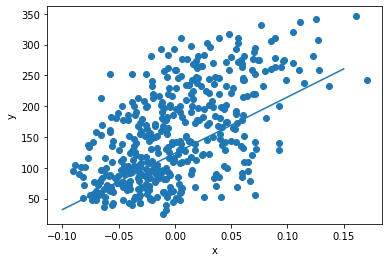

In [14]:
class Newron:
    def __init__(self): # 생성자, a=Newron(); 으로 생성 시 기본 값
        self.w=1.0
        self.b=1.0
    def forpass(self,x): # 직선의 방정식을 통한 예측값 y_hat 구하는 법
        y_hat=self.w*x+self.b
        return y_hat
    def backprop(self,x,err): # 역전파를 이용해서 가중치 업데이트
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad
    def fit(self, x, y, epochs=100): # 훈련 모델
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat=self.forpass(x_i)
                err=(y_i-y_hat)
                w_grad, b_grad=self.backprop(x_i, err)
                self.w+=w_grad
                self.b+=b_grad
newron=Newron()
newron.fit(x,y)

plt.scatter(x,y)
pt1=(-0.1, -0.1*newron.w+newron.b)
pt2=(0.15, 0.15*newron.w+newron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
